In [4]:
import numpy
import random
from scipy.optimize import minimize


EPS = 1e-12

def likelihood(thetas: tuple[int, int], input: numpy.ndarray | list):
    mapping = {
        (0, 0): thetas[0], 
        (0, 1): 1 - thetas[0],
        (1, 1): thetas[1], 
        (1, 0): 1 - thetas[1]
    }

    neg_log_lik = 0 

    for i in range(len(input)-1):
        neg_log_lik -= numpy.log(mapping[(input[i], input[i+1])] + EPS)
    
    return neg_log_lik


input = numpy.loadtxt("Input.txt")

theta_0 = [0.5, 0.5]
bounds = ((0, 1), (0, 1))

observed_mle = minimize(fun=lambda thetas: likelihood(thetas, input), x0 = theta_0, bounds = bounds).x

random.seed(3)

resampled = random.choices(input, k=len(input))
check_resampling = numpy.loadtxt("Exc7Task1_BootstrapSample1.txt")
assert numpy.array_equal(resampled, check_resampling)

resampled_theta_0 = [0.2, 0.2]
resampled_mle = minimize(fun=lambda thetas: likelihood(thetas, resampled), x0 = theta_0, bounds = bounds).x



In [5]:
observed_mle

array([0.57142863, 0.75      ])

In [6]:
resampled_mle

array([0.37499997, 0.59090906])

In [18]:
random.choices([0,1], weights=[0.4,0.6], k = 18)

[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [15]:
n_1 = sum(input)
n_1

np.float64(25.0)

In [17]:
n_0 = len(input) -n_1
n_0

np.float64(14.0)

In [20]:
resampled_mle

array([0.66666668, 0.42856982])

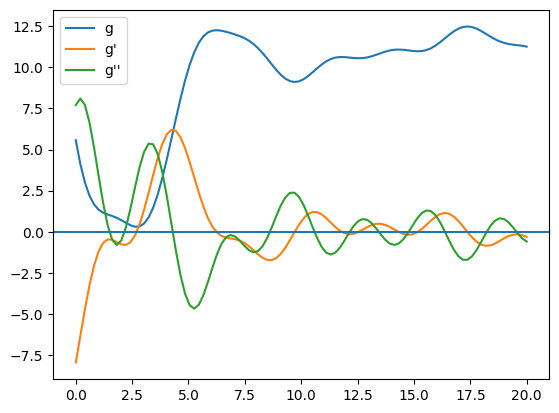

In [79]:
import numpy
import matplotlib.pyplot as plt
from Exc7Task2a import g, first_deriv_g, second_deriv_g


data = numpy.loadtxt("Data.txt", ndmin=2, converters=float, delimiter=",")
# data is of the form (ti, yi)

theta_vals = numpy.linspace(0, 20, 100)
t = data[:, 0]
y = data[:, 1]

g_vals = [g(t = t, y = y,  theta=i) for i in theta_vals]
g_prime_vals = numpy.array([first_deriv_g(t = t, y = y,  theta=i) for i in theta_vals])
g_double_prime_vals = numpy.array([second_deriv_g(t = t, y = y,  theta=i) for i in theta_vals])

plt.plot(theta_vals, g_vals, label = "g")
plt.plot(theta_vals, g_prime_vals, label = "g'")
plt.plot(theta_vals, g_double_prime_vals, label = "g''")
plt.axhline(y=0)
plt.legend()
plt.show()

In [80]:
# find the positions where the first derivative intersects the x axis
# i think the easiest way to do this is to find where the sign flips between successive value of g'
zero_crossings_idx = numpy.where(numpy.sign(g_prime_vals[:-1]) != numpy.sign(g_prime_vals[1:]))[0]
zero_crossings_idx

array([13, 30, 48, 58, 62, 70, 75, 85])

In [82]:
# find the corresponding theta to the local optima 
minima_idx = zero_crossings_idx[g_double_prime_vals[zero_crossings_idx] > 0]
minima_idx 


array([13, 48, 62, 75])

In [84]:
# theta values corresponding to all optima 
print(theta_vals[minima_idx])

[ 2.62626263  9.6969697  12.52525253 15.15151515]
